#                                            Heart Disease Prediction

### Importing the libraries

In [1]:
#importing the libraries rquried
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

### Loading the Data

In [2]:
#Reading the data with th help of pandas
dataset = pd.read_csv("heart.csv",sep=',')

In [3]:
print(dataset)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    

### Dataset Information

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279BD7CC748>,
      dtype=object)

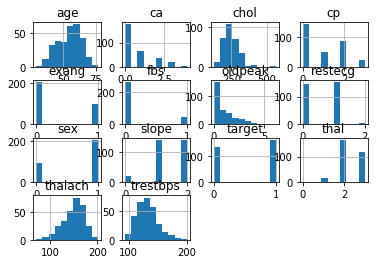

In [5]:
dataset.hist()

### Description

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Correlation between columns

In [7]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### preprocessing the data

In [8]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
print(X)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    

### Splitting the data into training and testing

In [9]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

## RandomForest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
max_accuracy=0
for x in range(2000):
    randomforest=RandomForestClassifier(random_state=x)
    randomforest.fit(X_train,y_train)
    y_pred=randomforest.predict(X_test)
    accuracy=round(accuracy_score(y_pred,y_test)*100,2)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        best_x=x

In [11]:
randomforest=RandomForestClassifier(random_state=best_x)
randomforest.fit(X_train,y_train)
y_pred=randomforest.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1]


### Evaluating the Random Forest Algorithm

In [12]:
print("Evaluating the Random Forest Algorithm")
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
print("Accuracy:(in%)",round(accuracy_score(y_pred,y_test)*100,2))
accuracy_rf=round(accuracy_score(y_pred,y_test)*100,2)

Evaluating the Random Forest Algorithm
[[27  3]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.91      1.00      0.95        31

   micro avg       0.95      0.95      0.95        61
   macro avg       0.96      0.95      0.95        61
weighted avg       0.96      0.95      0.95        61

Accuracy:(in%) 95.08


#### The accuracy achieved using Random Forest is: 95.08 %

## Decision Tree

### Creating the classifier object using Gini

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

### predicting on the testing set

In [14]:
y_pred=clf_gini.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]


### Evaluating the Decision Tree Algorithm

In [15]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Evaluating the Decision Tree by Gini")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:(in%)",round(accuracy_score(y_test,y_pred)*100,2))
accuracy_dtg=round(accuracy_score(y_test,y_pred)*100,2)

Evaluating the Decision Tree by Gini
[[23  4]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Accuracy:(in%) 81.97


### Creating the classifier object using Entropy

In [16]:
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

### predicting on the testing set 

In [17]:
y_pred =clf_entropy.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]


### Evaluating the Decision Tree Algorithm

In [18]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Evaluating the Decision Tree by Entropy")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:(in%)",round(accuracy_score(y_test,y_pred)*100,2))
accuracy_dte=round(accuracy_score(y_test,y_pred)*100,2)

Evaluating the Decision Tree by Entropy
[[23  4]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Accuracy:(in%) 81.97


In [19]:
accuracy_dt= accuracy_dte
print(accuracy_dt)

81.97


#### The accuracy achieved using Decision Tree is: 81.97 %

## K-Nearest Neighbors

### Training and Predicting using K-NN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=23)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0]


### Evaluating the KNN Algorithm

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Evaluating the KNN ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:(in%)",round(accuracy_score(y_test,y_pred)*100,2))
accuracy_knn=round(accuracy_score(y_test,y_pred)*100,2)

Evaluating the KNN 
[[19  8]
 [11 23]]
              precision    recall  f1-score   support

           0       0.63      0.70      0.67        27
           1       0.74      0.68      0.71        34

   micro avg       0.69      0.69      0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

Accuracy:(in%) 68.85


### Calculating error for K values between 1 and 40

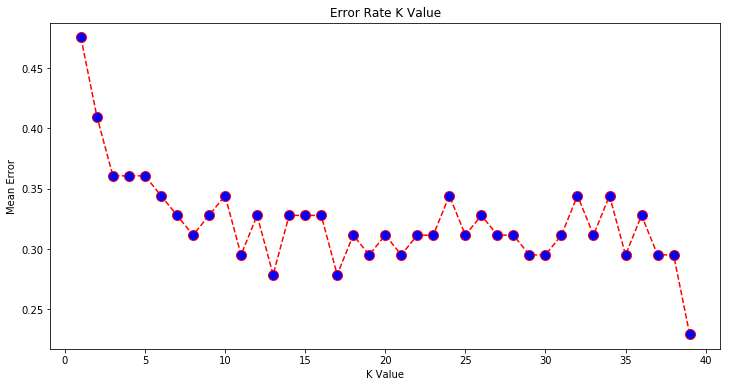

In [22]:
error=[]
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
error=[]

#### The accuracy achieved using KNN is:  68.85%

## Support Vector Machine

### Training and Predicting using SVM

In [23]:
from sklearn import svm
s=svm.SVC(kernel='linear')
s.fit(X_train,y_train)
y_pred=s.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


### Evaluating the SVM Algorithm

In [24]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Evaluating the SVM ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:(in%)",round(accuracy_score(y_test,y_pred)*100,2))
accuracy_svm=round(accuracy_score(y_test,y_pred)*100,2)

Evaluating the SVM 
[[20  7]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

Accuracy:(in%) 81.97


#### The accuracy achieved using SVM is: 81.97%

## Navie Bayes

### Training and Predicting using Navie Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
y_pred = gnb.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


### Evaluating the Navie bayes Algorithm

In [27]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Evaluating the NavieBayes ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:(in%)",round(accuracy_score(y_test,y_pred)*100,2))
accuracy_nb=round(accuracy_score(y_test,y_pred)*100,2)

Evaluating the NavieBayes 
[[21  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy:(in%) 85.25


#### The accuracy achieved using  Navie Bayes is: 85.25%

## XGBoost

### Training and Predicting using XGBoost

In [28]:
import xgboost as xb
xgb_model=xb.XGBClassifier(objective="binary:logistic",random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [29]:
y_pred = xgb_model.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


### Evaluating the xgboost Algorithm

In [30]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Evaluating the xgboost ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:(in%)",round(accuracy_score(y_test,y_pred)*100,2))
accuracy_xb=round(accuracy_score(y_test,y_pred)*100,2)

Evaluating the xgboost 
[[22  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy:(in%) 85.25


#### The accuracy achieved using XGBoost is: 85.25%

## Logistic Regression

### Training and predicting the data using LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


### Evaluating the Logistic Regression Algorithm

In [32]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Evaluating the Logistic Regression ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:(in%)",round(accuracy_score(y_test,y_pred)*100,2))
accuracy_lr=round(accuracy_score(y_test,y_pred)*100,2)

Evaluating the Logistic Regression 
[[22  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy:(in%) 85.25


#### The accuracy achieved using Logistic Regression is: 85.25%

In [33]:
scores=[accuracy_rf,accuracy_dt,accuracy_nb,accuracy_svm,accuracy_knn,accuracy_xb,accuracy_lr]
algorithms=["Random Forest","Decision Tree","Navie Bayes","Support Vector Machine","K-Nearest Neighbors","XGBoost","Logistic Regression"]

### Comparsion Between the Accuracies of Different Algorithms

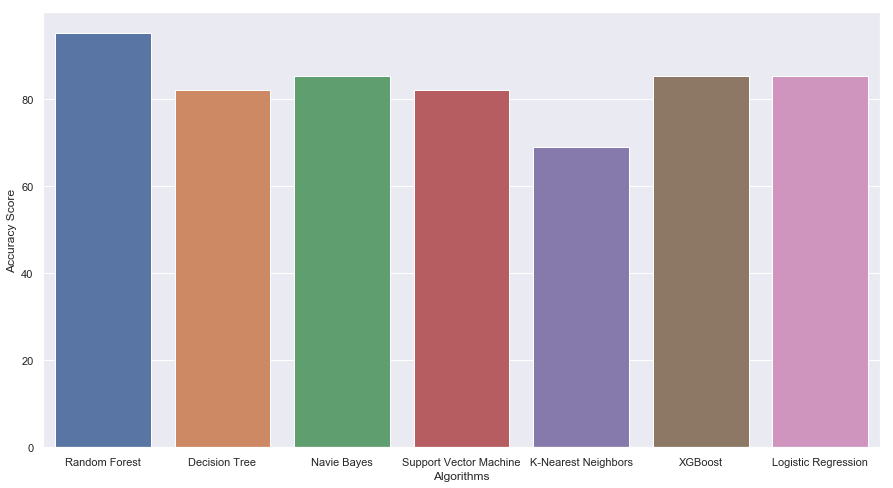

In [34]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
sns.barplot(algorithms,scores)

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body text=green>
    <h2>Random Forest has the Best Accuracy than the other Algorithms</h2>
</body>
</html>
